In [128]:
import pandas as pd
import glob
import numpy as numpy
import matplotlib.pyplot as plt
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in data


In [2]:
dict_of_stocks_and_dfs = {}
for file_ in glob.glob('../data/updated_historical_stock_data/*.csv'):
    stock_name = file_.rsplit("/")[-1].split('_')[0].lower() 
    print(f"Reading in {stock_name}")
    dict_of_stocks_and_dfs[stock_name] = pd.read_csv(f"{file_}")


Reading in pnr
Reading in bac
Reading in ni
Reading in vno
Reading in ual
Reading in efx
Reading in ph
Reading in rop
Reading in are
Reading in pg
Reading in pvh
Reading in lb
Reading in cern
Reading in peg
Reading in adbe
Reading in emr
Reading in ce
Reading in eqix
Reading in rost
Reading in so


In [3]:
# key is company value is df of data
dict_of_stocks_and_dfs.keys()

dict_keys(['pnr', 'bac', 'ni', 'vno', 'ual', 'efx', 'ph', 'rop', 'are', 'pg', 'pvh', 'lb', 'cern', 'peg', 'adbe', 'emr', 'ce', 'eqix', 'rost', 'so'])

# Create correlation features
- Daily, weekly, 30-days, 90-days, 180-days, 365-days

In [87]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]

In [88]:
#  filter second df by the dates in first

# here the date is not the index, yet
second_stock_df = dict_of_stocks_and_dfs['emr'].loc[ dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date), :]

## Set the date as the index and sort

In [89]:
first_stock_df = first_stock_df.sort_values('date')
second_stock_df = second_stock_df.sort_values('date')

first_stock_df = first_stock_df.set_index('date')
second_stock_df = second_stock_df.set_index('date')

In [116]:
first_stock_df.index.max()

'2020-04-17'

In [117]:
second_stock_df.index.max()

'2020-04-17'

In [90]:
np.corrcoef(first_stock_df.close, second_stock_df.close) # all time corrcoef

array([[1.        , 0.95353675],
       [0.95353675, 1.        ]])

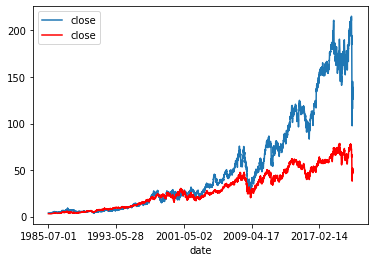

In [98]:

ax = first_stock_df.plot(y='close')
second_stock_df.plot(y='close', color='red', ax=ax)

In [152]:
n_rows = len(first_stock_df)
n_days_stride = 30

previous_row = 0
c = 0

correlation_per_time_period = defaultdict(list)
for day_window in range(n_rows):
    
    if day_window % 50 == 0:
        print(f"Idx {day_window} out of {n_rows}")
    first_stock= first_stock_df.iloc[previous_row:day_window + n_days_stride, :]
    second_stock = second_stock_df.iloc[previous_row:day_window + n_days_stride, :]
#     print(f"Correcoef for {first_stock.index.min()} to {second_stock.index.max()}")
    correlation = np.corrcoef(first_stock.close, second_stock.close)[0,1]
#     print(correlation) 
    
    correlation_per_time_period['date'].append(first_stock.index.min())
    correlation_per_time_period['correlation'].append(correlation)
    
    previous_row+= 1

    
    

Idx 0 out of 8988
Idx 50 out of 8988
Idx 100 out of 8988
Idx 150 out of 8988
Idx 200 out of 8988
Idx 250 out of 8988
Idx 300 out of 8988
Idx 350 out of 8988
Idx 400 out of 8988
Idx 450 out of 8988
Idx 500 out of 8988
Idx 550 out of 8988
Idx 600 out of 8988
Idx 650 out of 8988
Idx 700 out of 8988
Idx 750 out of 8988
Idx 800 out of 8988
Idx 850 out of 8988
Idx 900 out of 8988
Idx 950 out of 8988
Idx 1000 out of 8988
Idx 1050 out of 8988
Idx 1100 out of 8988
Idx 1150 out of 8988
Idx 1200 out of 8988
Idx 1250 out of 8988
Idx 1300 out of 8988
Idx 1350 out of 8988
Idx 1400 out of 8988
Idx 1450 out of 8988
Idx 1500 out of 8988
Idx 1550 out of 8988
Idx 1600 out of 8988
Idx 1650 out of 8988
Idx 1700 out of 8988
Idx 1750 out of 8988
Idx 1800 out of 8988
Idx 1850 out of 8988
Idx 1900 out of 8988
Idx 1950 out of 8988
Idx 2000 out of 8988
Idx 2050 out of 8988
Idx 2100 out of 8988
Idx 2150 out of 8988
Idx 2200 out of 8988
Idx 2250 out of 8988
Idx 2300 out of 8988
Idx 2350 out of 8988
Idx 2400 out of

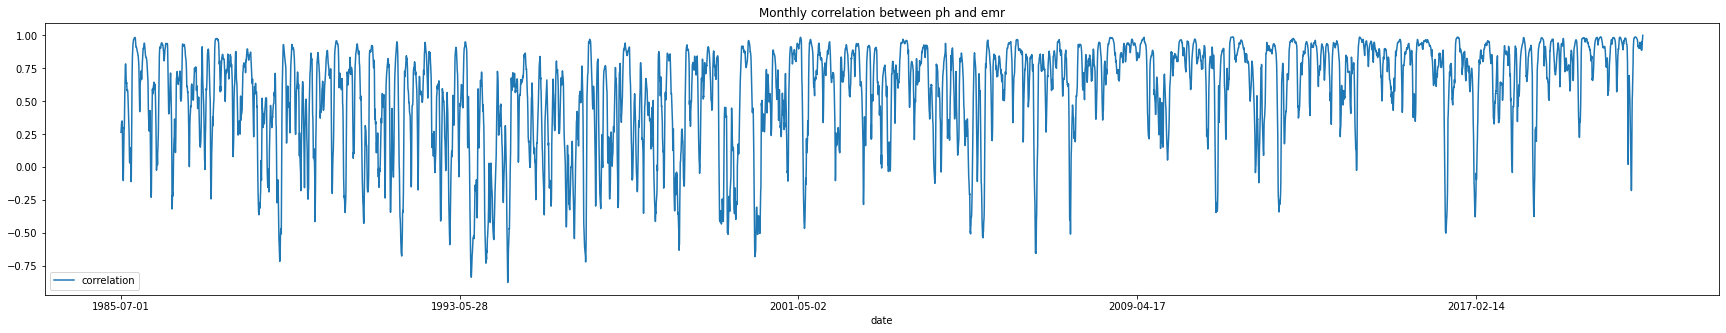

In [154]:
pd.DataFrame(correlation_per_time_period).set_index('date').plot(figsize=(30,5), title='Monthly correlation between ph and emr')

In [22]:
if min_date_fiirst_stock < min_date_second_stock:
    print('here')
    # use min_date_second_stock

here


In [ ]:
for first_stock in dict_of_stocks_and_dfs.keys():
    for second_stock in dict_of_stocks_and_dfs.keys():
        min_date_fiirst_stock = dict_of_stocks_and_dfs[f"{first_stock}"].date.min()
        min_date_second_stock= dict_of_stocks_and_dfs[f"{second_stock}"].date.min()

        date_filter_min  = max(min_date_fiirst_stock, min_date_second_stock)

        # filter the DFs to have the same date range
        filtered_first_stock_df = dict_of_stocks_and_dfs[f"{first_stock}"][dict_of_stocks_and_dfs[f"{first_stock}"].date >= date_filter]
        filtered_second_stock_df = dict_of_stocks_and_dfs[f"{second_stock}"][dict_of_stocks_and_dfs[f"{second_stock}"].date >= date_filter]

# Note: will eventuall need to add in 0s for stocks withour correlation data with other stocks due to date range